In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime, date

%matplotlib inline

In [4]:
AW_data = pd.read_csv('AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']
AW_test = pd.read_csv('AW_test.csv')
AW_data.head(10)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1
5,11005,NaN,Julio,NaN,Ruiz,NaN,7305 Humphrey Drive,NaN,East Brisbane,Queensland,...,Professional,M,S,1,1,0,0,103199,78,1
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,Professional,F,S,1,1,0,0,84756,54,1
7,11007,NaN,Marco,NaN,Mehta,NaN,942 Brook Street,NaN,Warrnambool,Victoria,...,Professional,M,M,1,2,3,3,109759,130,1
8,11008,NaN,Rob,NaN,Verhoff,NaN,624 Peabody Road,NaN,Bendigo,Victoria,...,Professional,F,S,1,3,4,4,88005,85,1
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,Professional,M,S,0,1,0,0,106399,74,0


In [5]:
AW_data.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [6]:
AW_data.columns
AW_data.shape
AW_data.isnull().sum()


CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

In [7]:
AW_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)
AW_data.head(10)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1
5,11005,Julio,Ruiz,7305 Humphrey Drive,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,...,Professional,M,S,1,1,0,0,103199,78,1
6,11006,Janet,Alvarez,2612 Berry Dr,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,...,Professional,F,S,1,1,0,0,84756,54,1
7,11007,Marco,Mehta,942 Brook Street,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,...,Professional,M,M,1,2,3,3,109759,130,1
8,11008,Rob,Verhoff,624 Peabody Road,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,...,Professional,F,S,1,3,4,4,88005,85,1
9,11009,Shannon,Carlson,3839 Northgate Road,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,...,Professional,M,S,0,1,0,0,106399,74,0


In [12]:
AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AW_data.shape)
print(AW_data.CustomerID.unique().shape)

(16404, 21)
(16404,)


In [9]:
print(AW_data.columns)


Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')


In [10]:
AW_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [14]:
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(AW_data, cat_cols)


For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

For column NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

For column NumberChildrenAtHome
0    9924
1    2180
2    1455
3    1057
4     943
5     84

       Occupation  NumberChildrenAtHome
0        Clerical                     0
1      Management                     1
2          Manual                     0
3    Professional                     1
4  Skilled Manual                     0


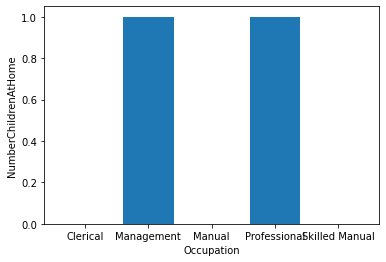

In [15]:
counts = AW_data.groupby(["Occupation"], as_index = False)['NumberChildrenAtHome'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['NumberChildrenAtHome']])
plt.bar(temp[0], temp[1])
plt.xlabel('Occupation')
plt.ylabel('NumberChildrenAtHome')
plt.show()

   NumberCarsOwned  NumberChildrenAtHome
0                0                     0
1                1                     0
2                2                     0
3                3                     3
4                4                     4


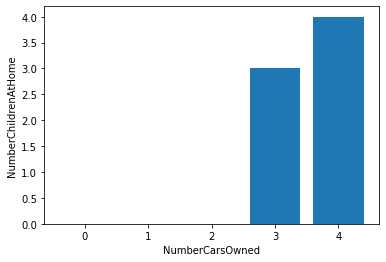

In [16]:
counts = AW_data.groupby(["NumberCarsOwned"], as_index = False)['NumberChildrenAtHome'].median()
print(counts)
temp = np.array([counts['NumberCarsOwned'],counts['NumberChildrenAtHome']])
plt.bar(temp[0], temp[1])
plt.xlabel('NumberCarsOwned')
plt.ylabel('NumberChildrenAtHome')
plt.show()

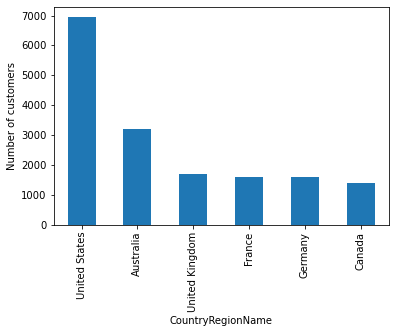

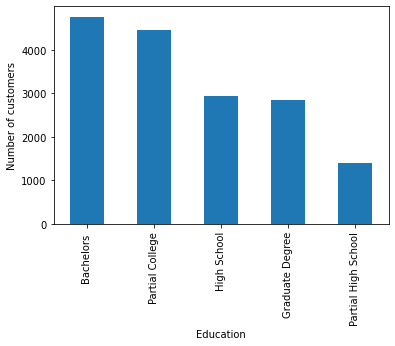

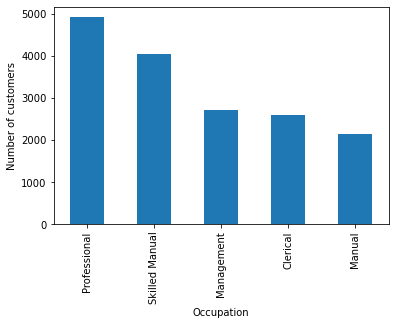

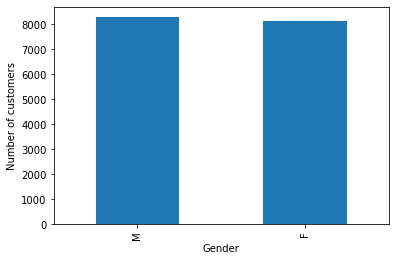

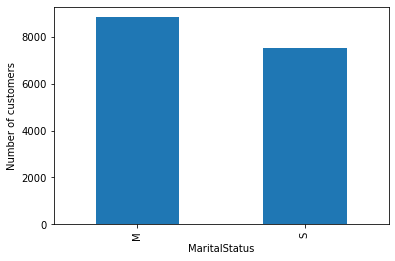

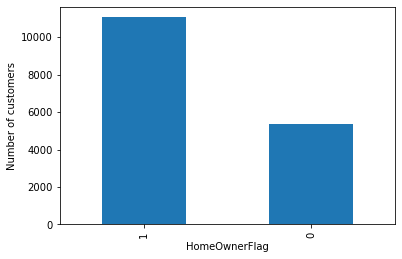

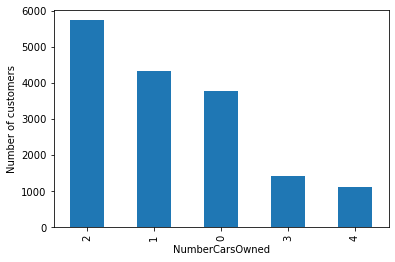

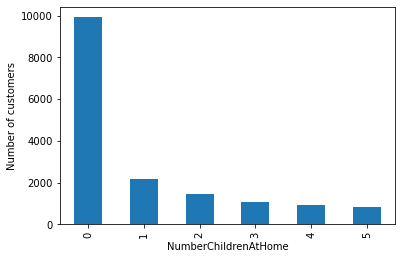

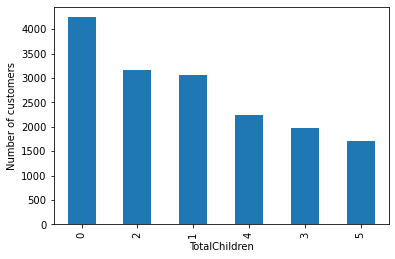

In [17]:
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure() 
        ax = fig.gca() 
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax)
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

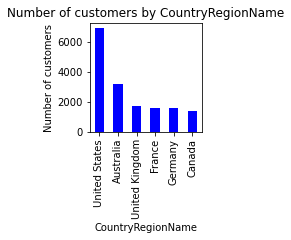

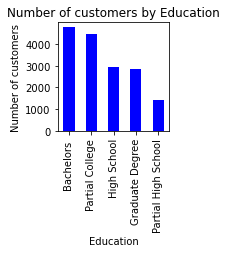

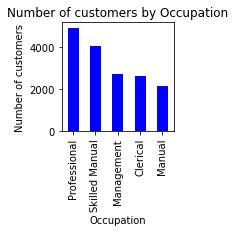

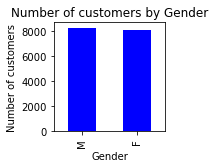

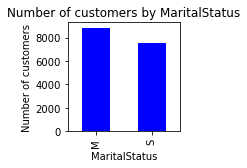

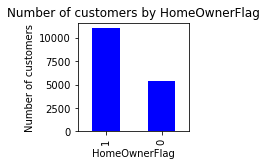

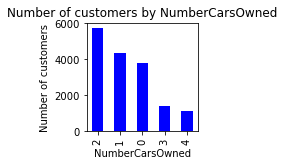

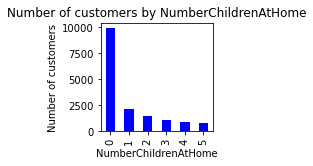

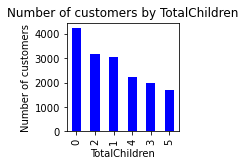

In [19]:
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(2,2)) 
        ax = fig.gca()    
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of customers by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

In [25]:
inc_cols = ['YearlyIncome','AveMonthSpend']

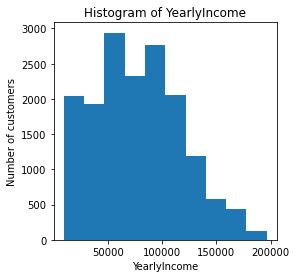

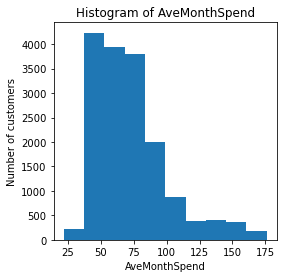

In [26]:
def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(4,4)) 
        ax = fig.gca()     
        data[col].plot.hist(ax = ax, bins = bins) 
        ax.set_title('Histogram of ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_histogram(AW_data, inc_cols)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


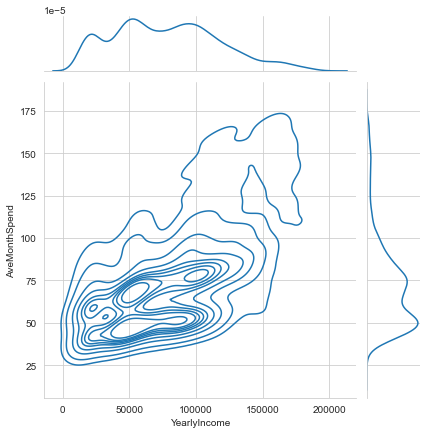

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LinAlgError: singular matrix

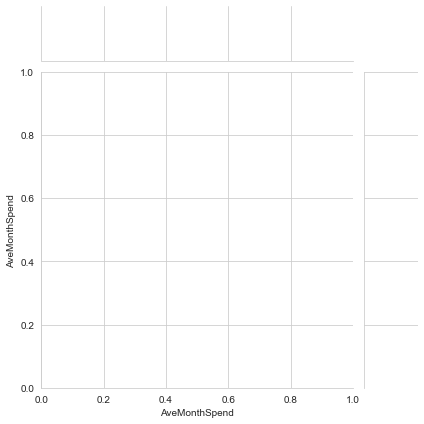

In [27]:
def plot_density_2d(data, cols, col_y = 'AveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=data, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_density_2d(AW_data,inc_cols)

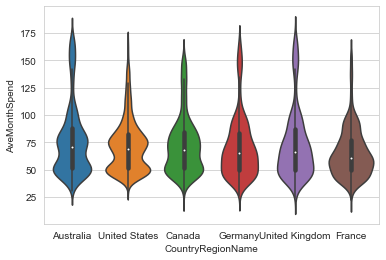

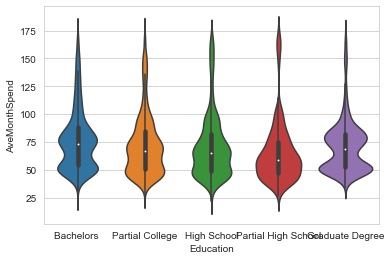

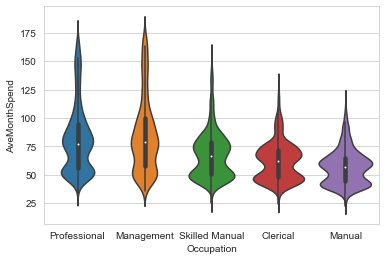

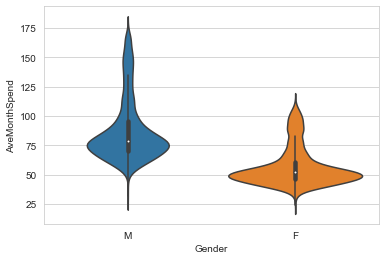

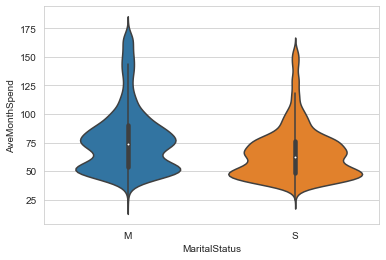

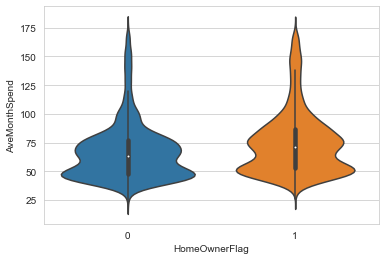

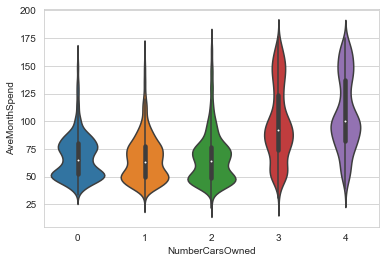

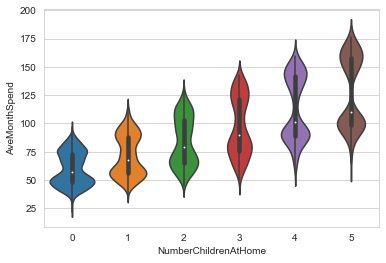

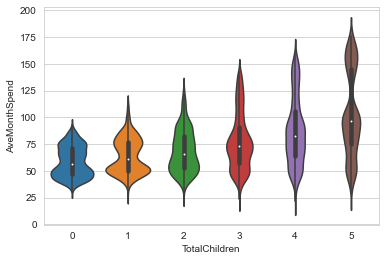

In [29]:
def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.violinplot(x = col, y = col_y, data=data)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.show()
plot_violin(AW_data, cat_cols)

# PART 2

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


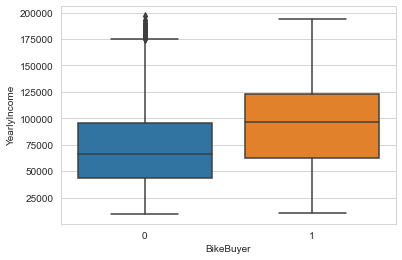

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


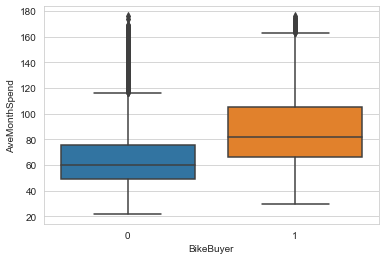

In [31]:
def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) 
        plt.ylabel(col)
        plt.show()

plot_box(AW_data, inc_cols)